In [1]:
#Lo primero que tendremos que hacer es importar algunas librerías necesarias para después cargar nuestro dataset. Para evitar
#problemas, creare un dataset de train y otro de test

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline


from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./Accidentefinal.csv', sep=';', decimal='.')
trainOK, testOK = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {trainOK.shape}')
print(f'Dimensiones del dataset de test: {testOK.shape}')

# Guardamos
trainOK.to_csv('./trainOK.csv', sep=';', decimal='.', index=False)
testOK.to_csv('./testOK.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

data = pd.read_csv('./trainOK.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (159992, 37)
Dimensiones del dataset de test: (39999, 37)


In [2]:
data.head().T
df=data
df.T

,0,1,2,3,4,5,6,7,8,9,...,159982,159983,159984,159985,159986,159987,159988,159989,159990,159991
Unnamed: 0,148526,118444,180939,53063,175510,173917,156545,36154,132070,24144,...,122579,41993,97639,95939,152315,176963,117952,173685,43567,199340
Lesividad,HL,HL,HL,HL,HL,IL,HL,IL,IL,HL,...,IL,IL,HL,HL,HL,IL,HL,IL,IL,IL
Rango_horario,DE 16:00 A 16:59,DE 17:00 A 17:59,DE 4:00 A 4:59,DE 5:00 A 5:59,DE 14:00 A 14:59,DE 13:00 A 13:59,DE 19:00 A 19:59,DE 20:00 A 20:59,DE 14:00 A 14:59,DE 15:00 A 15:59,...,DE 18:00 A 18:59,DE 23:00 A 23:59,DE 14:00 A 14:59,DE 23:00 A 23:59,DE 13:00 A 13:59,DE 12:00 A 12:59,DE 10:00 A 10:59,DE 15:00 A 15:59,DE 18:00 A 18:59,DE 7:00 A 7:59
Dia_semana,DOMINGO,MIERCOLES,VIERNES,MARTES,SABADO,SABADO,MIERCOLES,DOMINGO,LUNES,JUEVES,...,LUNES,DOMINGO,VIERNES,JUEVES,DOMINGO,SABADO,MIERCOLES,VIERNES,VIERNES,DOMINGO
Distrito,VICALVARO,CIUDAD LINEAL,CIUDAD LINEAL,ARGANZUELA,ARGANZUELA,HORTALEZA,MONCLOA-ARAVACA,CARABANCHEL,CENTRO,HORTALEZA,...,PUENTE DE VALLECAS,CENTRO,SALAMANCA,VILLA DE VALLECAS,TETUAN,SALAMANCA,CHAMARTIN,CENTRO,PUENTE DE VALLECAS,CENTRO
Lugar_accidente,AVENIDA DEL MEDITERRANEO KM.,CALLE DE LA VIRGEN DE AFRICA - CALLE DE LA VIR...,CALLE DE ASCAO - CALLE DE GUTIERRE DE CETINA,PLAZA DEL EMPERADOR CARLOS V - PASEO DE LA INF...,CALLE DE RICARDO DAMAS - CALLE DE RICARDO GOIZ...,CALLE DE AGATHA CHRISTIE - CALLE DE SAN ENRIQU...,AUTOVIA M-30 CALZADA 2 KM.,AVENIDA DE LOS POBLADOS - CALLE VIA LUSITANA,CALLE MAYOR - CALLE DE BAILEN,CALLE DE LOPEZ DE HOYOS - PLAZA DE LOS SANTOS ...,...,AVENIDA DE LA ALBUFERA,CALLE GRAN VIA - CALLE DEL CLAVEL,CALLE DE MARIA DE MOLINA,CALLE DEL CONGOSTO,CALLE DE SINESIO DELGADO - CALLE DEL CAPITAN B...,AUTOVIA M-30 CALZADA 1 - CALLE DE ALCALA,CALLE DE MARIA DE MOLINA,CALLE DE CAMPOAMOR - CALLE DE SANTA TERESA,AVENIDA DE LA ALBUFERA,CALLE GRAN VIA - CALLE DE SAN BERNARDO
Parte,2011/8899,2015/5891,2012/7706,2013/887,2014/5084,2017/3563,2014/4753,2018/1889,2014/11958,2011/10652,...,2018/5741,2015/11024,2017/170,2013/6886,2011/12156,2017/7514,2017/318,2015/7710,2018/14034,2012/2866
Granizo,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
Hielo,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
Hielo.1,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


Vamos a comenzar nuestro análisis exploratorio comprobando que nuestro dataset ya está limpio de missing values ( lo hemos hecho con anterioridad )

In [3]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(data)
       
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [4]:
missing_values_table(df)

Your selected dataframe has 37 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [5]:
df.isna().sum()

Unnamed: 0              0
Lesividad               0
Rango_horario           0
Dia_semana              0
Distrito                0
Lugar_accidente         0
Parte                   0
Granizo                 0
Hielo                   0
Hielo.1                 0
Lluvia                  0
Niebla                  0
Seco                    0
Nieve                   0
Mojada                  0
Aceite                  0
Barro                   0
Gravilla                0
Hielo.2                 0
Hielo.3                 0
Seca_limpia             0
Tipo_accidente          0
Tipo_vehiculo           0
Tipo_persona            0
Sexo                    0
Tramo_edad              0
Latitud                 0
Longitud                0
Distancia_ocio_km       0
Lejania_ocio            0
Distancia_radares_km    0
Lejania_radares         0
Fecha_formato           0
Year                    0
Mes                     0
Dia                     0
Dia_habil               0
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'Lesividad', 'Rango_horario', 'Dia_semana', 'Distrito',
       'Lugar_accidente', 'Parte', 'Granizo', 'Hielo', 'Hielo.1', 'Lluvia',
       'Niebla', 'Seco', 'Nieve', 'Mojada', 'Aceite', 'Barro', 'Gravilla',
       'Hielo.2', 'Hielo.3', 'Seca_limpia', 'Tipo_accidente', 'Tipo_vehiculo',
       'Tipo_persona', 'Sexo', 'Tramo_edad', 'Latitud', 'Longitud',
       'Distancia_ocio_km', 'Lejania_ocio', 'Distancia_radares_km',
       'Lejania_radares', 'Fecha_formato', 'Year', 'Mes', 'Dia', 'Dia_habil'],
      dtype='object')

Chequeamos las distintas features borrando las valores poco útiles para nuestro estudio

In [7]:
df['Distrito'].value_counts()

CHAMARTIN                         12095
SALAMANCA                         11863
CENTRO                            11290
CIUDAD LINEAL                     10403
PUENTE DE VALLECAS                10196
CARABANCHEL                        9572
CHAMBERI                           9368
RETIRO                             9222
FUENCARRAL-EL PARDO                8838
TETUAN                             8766
MONCLOA-ARAVACA                    8456
ARGANZUELA                         8059
SAN BLAS                           7621
LATINA                             7603
USERA                              5861
HORTALEZA                          5399
VILLAVERDE                         4400
MORATALAZ                          3927
VILLA DE VALLECAS                  2937
VICALVARO                          1957
BARAJAS                            1821
VILLA DE VALLECAS                   338
Name: Distrito, dtype: int64

In [8]:
df['Tipo_accidente'].value_counts()

COLISIÓN DOBLE             96769
ATROPELLO                  22187
COLISIÓN MÚLTIPLE          20394
CAÍDA MOTOCICLETA           8496
CHOQUE CON OBJETO FIJO      6059
CAÍDA VIAJERO BUS           1813
CAÍDA CICLOMOTOR            1585
CAÍDA BICICLETA             1476
VUELCO                       609
OTRAS CAUSAS                 597
CAÍDA VEHÍCULO 3 RUEDAS        7
Name: Tipo_accidente, dtype: int64

In [9]:
df = df.drop(df[df['Tipo_accidente']=='OTRAS CAUSAS'].index)

In [10]:
df['Tramo_edad'].value_counts()

DE 30 A 34 ANOS      20770
DE 25 A 29 AÑOS      20244
DE 35 A 39 AÑOS      19976
DE 40 A 44 AÑOS      17314
DE 45 A 49 AÑOS      14633
DE 21 A 24 AÑOS      13346
DE 50 A 54 AÑOS      12066
DE 55 A 59 AÑOS       8305
DE 18 A 20 AÑOS       6342
DE 60 A 64 AÑOS       5611
DE MAS DE 74 AÑOS     4590
DE 65 A 69 AÑOS       3444
DE 70 A 74 AÑOS       2574
DESCONOCIDA           2355
DE 0 A 5 AÑOS         2335
DE 10 A 14 AÑOS       2028
DE 15 A 17 AÑOS       1768
DE 6 A 9 AÑOS         1694
Name: Tramo_edad, dtype: int64

In [11]:
df = df.drop(df[df['Tramo_edad']=='DESCONOCIDA'].index)

Veamos que es cada columna:

Lesividad: Será nuestra variable target, grado de gravedad del accidentado 

Rango_horario: Hora del accidente en intervalos de 59 min

Dia_semana: Día del accidente

Distrito: Barrio donde ocurre el accidente

Parte: Número único de identificación del accidente ( un número de parte = un accidente )

Granizo: Estado del tiempo, en este caso existencia o no de granizo

Hielo: Estado del tiempo, en este caso existencia o no de helada

Lluvia: Estado del tiempo, en este caso existencia o no de lluvia

Niebla: Estado del tiempo, en este caso existencia o no de niebla

Seco: Estado del tiempo, seco o no

Nieve: Estado del tiempo, en este caso existencia o no de nieve

Mojada: Estado de la calzada, en este caso si está mojada o no

Aceite: Estado de la calzada, en este caso existencia o no de aceite en la calzada

Barro: Estado de la calzada, en este caso existencia o no de barro en la calzada

Gravilla: Estado de la calzada, en este caso existencia o no de grava suelta en la calzada

Seca_limpia: Estado de la calzada, en este caso condiciones óptimas o no

Tipo_accidente: Tipo de accidente ( colisión doble, atropello...)

Tipo_vehículo: Tipo de vehículo involucrado en el accidente ( turismo, motocicleta...)

Tipo_persona: Rol de la persona en el accidente (conductor, testigo...)

Sexo: Masculino o femenino

Tramo_edad: Edad del accidentado en rango

Latitiud : Latitud del punto del accidente

Longitud : Longitud del punto del accidente

Distancia_ocio_km : Distancia del accidente a un lugar de ocio

Lejania_ocio : Categorización de como de lejos está el lugar de ocio del punto del accidente ( muy lejos ,lejos, cerca, muy cerca )

Distancia_radares_km : Distancia del accidente a un radar fijo

Lejania_radares  : Categorización de como de lejs está el radar del punto del accidente (muy lejos, lejos, cerca, muy cerca)

Fecha_formato : Fecha del accidente en formato legible para python

Year: Año del accidente

Mes: Mes del accidente

Dia : Día del accidente

Dia_habil: Variable binaria que indica si el día es laborable o no

Vamos a dropear la feature 'Unnamed:0' al no ser útil para nuestro análisis

In [12]:
df=df.drop(['Unnamed: 0'], axis=1)

La variable 'Lesividad' inicialmente tenía un valor 'NO ASIGNADA', el cuál cuando estuvimos limpiando el dataset lo eliminamos

Necesitamos los valores de 'Lesividad' numéricos por lo que hacemos una codificación ordinal en función de la lesividad:

In [13]:
lesividad_mapping = {'IL':0,
                     'HL':1,
                     'HG':2,
                     'MT':3}
df['Lesividad_numerica']=df['Lesividad'].map(lesividad_mapping)

In [14]:
df['Lesividad_numerica'].value_counts()

1    77784
0    72416
2     6642
3      198
Name: Lesividad_numerica, dtype: int64

In [15]:
df.head()

,Lesividad,Rango_horario,Dia_semana,Distrito,Lugar_accidente,Parte,Granizo,Hielo,Hielo.1,Lluvia,...,Distancia_ocio_km,Lejania_ocio,Distancia_radares_km,Lejania_radares,Fecha_formato,Year,Mes,Dia,Dia_habil,Lesividad_numerica
0,HL,DE 16:00 A 16:59,DOMINGO,VICALVARO,AVENIDA DEL MEDITERRANEO KM.,2011/8899,NO,NO,NO,NO,...,5.966126,muy lejos,20.034451,muy lejos,2011-02-10,2011,2,10,0,1
1,HL,DE 17:00 A 17:59,MIERCOLES,CIUDAD LINEAL,CALLE DE LA VIRGEN DE AFRICA - CALLE DE LA VIR...,2015/5891,NO,NO,NO,NO,...,0.795508,lejos,1.342058,muy lejos,2015-06-24,2015,6,24,1,1
2,HL,DE 4:00 A 4:59,VIERNES,CIUDAD LINEAL,CALLE DE ASCAO - CALLE DE GUTIERRE DE CETINA,2012/7706,NO,NO,NO,NO,...,1.809418,muy lejos,1.650425,muy lejos,2012-08-31,2012,8,31,1,1
3,HL,DE 5:00 A 5:59,MARTES,ARGANZUELA,PLAZA DEL EMPERADOR CARLOS V - PASEO DE LA INF...,2013/887,NO,NO,NO,NO,...,0.178982,Muy cerca,1.714715,muy lejos,2013-01-29,2013,1,29,1,1
4,HL,DE 14:00 A 14:59,SABADO,ARGANZUELA,CALLE DE RICARDO DAMAS - CALLE DE RICARDO GOIZ...,2014/5084,NO,NO,NO,NO,...,0.588265,lejos,0.080297,Muy cerca,2014-05-31,2014,5,31,0,1


Ponemos nuestra target 'Lesividad_numerica' en la primera columna

In [16]:
colnames = df.columns.tolist()
colnames = colnames[-1:] + colnames[:-1]
df=df[colnames]

In [17]:
df

,Lesividad_numerica,Lesividad,Rango_horario,Dia_semana,Distrito,Lugar_accidente,Parte,Granizo,Hielo,Hielo.1,...,Longitud,Distancia_ocio_km,Lejania_ocio,Distancia_radares_km,Lejania_radares,Fecha_formato,Year,Mes,Dia,Dia_habil
0,1,HL,DE 16:00 A 16:59,DOMINGO,VICALVARO,AVENIDA DEL MEDITERRANEO KM.,2011/8899,NO,NO,NO,...,-3.910258,5.966126,muy lejos,20.034451,muy lejos,2011-02-10,2011,2,10,0
1,1,HL,DE 17:00 A 17:59,MIERCOLES,CIUDAD LINEAL,CALLE DE LA VIRGEN DE AFRICA - CALLE DE LA VIR...,2015/5891,NO,NO,NO,...,-3.652941,0.795508,lejos,1.342058,muy lejos,2015-06-24,2015,6,24,1
2,1,HL,DE 4:00 A 4:59,VIERNES,CIUDAD LINEAL,CALLE DE ASCAO - CALLE DE GUTIERRE DE CETINA,2012/7706,NO,NO,NO,...,-3.641188,1.809418,muy lejos,1.650425,muy lejos,2012-08-31,2012,8,31,1
3,1,HL,DE 5:00 A 5:59,MARTES,ARGANZUELA,PLAZA DEL EMPERADOR CARLOS V - PASEO DE LA INF...,2013/887,NO,NO,NO,...,-3.692851,0.178982,Muy cerca,1.714715,muy lejos,2013-01-29,2013,1,29,1
4,1,HL,DE 14:00 A 14:59,SABADO,ARGANZUELA,CALLE DE RICARDO DAMAS - CALLE DE RICARDO GOIZ...,2014/5084,NO,NO,NO,...,-3.694110,0.588265,lejos,0.080297,Muy cerca,2014-05-31,2014,5,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159987,0,IL,DE 12:00 A 12:59,SABADO,SALAMANCA,AUTOVIA M-30 CALZADA 1 - CALLE DE ALCALA,2017/7514,NO,NO,NO,...,-3.674075,1.205056,muy lejos,0.170592,Muy cerca,2017-05-08,2017,5,8,0
159988,1,HL,DE 10:00 A 10:59,MIERCOLES,CHAMARTIN,CALLE DE MARIA DE MOLINA,2017/318,NO,NO,NO,...,-3.683344,0.216405,Cerca,2.342002,muy lejos,2017-11-01,2017,11,1,1
159989,0,IL,DE 15:00 A 15:59,VIERNES,CENTRO,CALLE DE CAMPOAMOR - CALLE DE SANTA TERESA,2015/7710,NO,NO,NO,...,-3.695925,0.021567,Muy cerca,2.707505,muy lejos,2015-08-28,2015,8,28,1
159990,0,IL,DE 18:00 A 18:59,VIERNES,PUENTE DE VALLECAS,AVENIDA DE LA ALBUFERA,2018/14034,NO,NO,NO,...,-3.645114,1.911166,muy lejos,2.276861,muy lejos,2018-11-16,2018,11,16,1


In [18]:
df['Lejania_ocio'].value_counts()

muy lejos    63769
Cerca        34407
Muy cerca    30928
lejos        27936
Name: Lejania_ocio, dtype: int64

In [19]:
lejania_mapping = {'Muy cerca':0,
                     'Cerca':1,
                     'lejos':2,
                     'muy lejos':3}
df['Lejania_ocio']=df['Lejania_ocio'].map(lejania_mapping)

In [20]:
df['Lejania_radares'].value_counts()

muy lejos    122134
lejos         23056
Cerca          8645
Muy cerca      3205
Name: Lejania_radares, dtype: int64

In [21]:
lejania2_mapping = {'Muy cerca':0,
                     'Cerca':1,
                     'lejos':2,
                     'muy lejos':3}
df['Lejania_radares']=df['Lejania_radares'].map(lejania2_mapping)

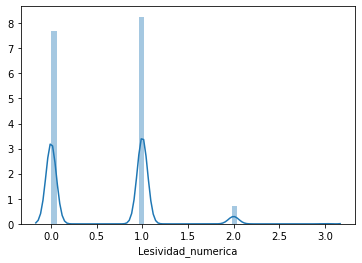

In [22]:
# Histograma:

sns.distplot(df['Lesividad_numerica']);

In [23]:
df.head()

,Lesividad_numerica,Lesividad,Rango_horario,Dia_semana,Distrito,Lugar_accidente,Parte,Granizo,Hielo,Hielo.1,...,Longitud,Distancia_ocio_km,Lejania_ocio,Distancia_radares_km,Lejania_radares,Fecha_formato,Year,Mes,Dia,Dia_habil
0,1,HL,DE 16:00 A 16:59,DOMINGO,VICALVARO,AVENIDA DEL MEDITERRANEO KM.,2011/8899,NO,NO,NO,...,-3.910258,5.966126,3,20.034451,3,2011-02-10,2011,2,10,0
1,1,HL,DE 17:00 A 17:59,MIERCOLES,CIUDAD LINEAL,CALLE DE LA VIRGEN DE AFRICA - CALLE DE LA VIR...,2015/5891,NO,NO,NO,...,-3.652941,0.795508,2,1.342058,3,2015-06-24,2015,6,24,1
2,1,HL,DE 4:00 A 4:59,VIERNES,CIUDAD LINEAL,CALLE DE ASCAO - CALLE DE GUTIERRE DE CETINA,2012/7706,NO,NO,NO,...,-3.641188,1.809418,3,1.650425,3,2012-08-31,2012,8,31,1
3,1,HL,DE 5:00 A 5:59,MARTES,ARGANZUELA,PLAZA DEL EMPERADOR CARLOS V - PASEO DE LA INF...,2013/887,NO,NO,NO,...,-3.692851,0.178982,0,1.714715,3,2013-01-29,2013,1,29,1
4,1,HL,DE 14:00 A 14:59,SABADO,ARGANZUELA,CALLE DE RICARDO DAMAS - CALLE DE RICARDO GOIZ...,2014/5084,NO,NO,NO,...,-3.694110,0.588265,2,0.080297,0,2014-05-31,2014,5,31,0


donde:

0 : 'IL, Ileso

1: 'HL', Herido Leve

2: 'HG', Herido Grave

3: 'MT', Fallecido

In [24]:
df=df.replace({"DE 00:00 A 00:59": 0, 
            "DE 1:00 A 1:59": 1,
            "DE 2:00 A 2:59": 2,
            "DE 3:00 A 3:59": 3,
            "DE 4:00 A 4:59": 4,
            "DE 5:00 A 5:59": 5,
            "DE 6:00 A 6:59": 6,
            "DE 7:00 A 7:59": 7,
            "DE 8:00 A 8:59": 8,
            "DE 9:00 A 9:59": 9,
            "DE 10:00 A 10:59": 10,
            "DE 11:00 A 11:59": 11,
            "DE 12:00 A 12:59": 12,
            "DE 13:00 A 13:59": 13,
            "DE 14:00 A 14:59": 14,
            "DE 15:00 A 15:59": 15,
            "DE 16:00 A 16:59": 16,
            "DE 17:00 A 17:59": 17,
            "DE 18:00 A 18:59": 18,
            "DE 19:00 A 19:59": 19,
            "DE 20:00 A 20:59": 20,
            "DE 21:00 A 21:59": 21,
            "DE 22:00 A 22:59": 22,
            "DE 23:00 A 23:59": 23})


In [25]:
df=df.replace({"LUNES": 1, 
            "MARTES": 2,
            "MIERCOLES": 3,
            "JUEVES": 4,
            "VIERNES": 5,
            "SABADO": 6,
            "DOMINGO": 7,
         })

In [26]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,159982,159983,159984,159985,159986,159987,159988,159989,159990,159991
Lesividad_numerica,1,1,1,1,1,0,1,0,0,1,...,0,0,1,1,1,0,1,0,0,0
Lesividad,HL,HL,HL,HL,HL,IL,HL,IL,IL,HL,...,IL,IL,HL,HL,HL,IL,HL,IL,IL,IL
Rango_horario,16,17,4,5,14,13,19,20,14,15,...,18,23,14,23,13,12,10,15,18,7
Dia_semana,7,3,5,2,6,6,3,7,1,4,...,1,7,5,4,7,6,3,5,5,7
Distrito,VICALVARO,CIUDAD LINEAL,CIUDAD LINEAL,ARGANZUELA,ARGANZUELA,HORTALEZA,MONCLOA-ARAVACA,CARABANCHEL,CENTRO,HORTALEZA,...,PUENTE DE VALLECAS,CENTRO,SALAMANCA,VILLA DE VALLECAS,TETUAN,SALAMANCA,CHAMARTIN,CENTRO,PUENTE DE VALLECAS,CENTRO
Lugar_accidente,AVENIDA DEL MEDITERRANEO KM.,CALLE DE LA VIRGEN DE AFRICA - CALLE DE LA VIR...,CALLE DE ASCAO - CALLE DE GUTIERRE DE CETINA,PLAZA DEL EMPERADOR CARLOS V - PASEO DE LA INF...,CALLE DE RICARDO DAMAS - CALLE DE RICARDO GOIZ...,CALLE DE AGATHA CHRISTIE - CALLE DE SAN ENRIQU...,AUTOVIA M-30 CALZADA 2 KM.,AVENIDA DE LOS POBLADOS - CALLE VIA LUSITANA,CALLE MAYOR - CALLE DE BAILEN,CALLE DE LOPEZ DE HOYOS - PLAZA DE LOS SANTOS ...,...,AVENIDA DE LA ALBUFERA,CALLE GRAN VIA - CALLE DEL CLAVEL,CALLE DE MARIA DE MOLINA,CALLE DEL CONGOSTO,CALLE DE SINESIO DELGADO - CALLE DEL CAPITAN B...,AUTOVIA M-30 CALZADA 1 - CALLE DE ALCALA,CALLE DE MARIA DE MOLINA,CALLE DE CAMPOAMOR - CALLE DE SANTA TERESA,AVENIDA DE LA ALBUFERA,CALLE GRAN VIA - CALLE DE SAN BERNARDO
Parte,2011/8899,2015/5891,2012/7706,2013/887,2014/5084,2017/3563,2014/4753,2018/1889,2014/11958,2011/10652,...,2018/5741,2015/11024,2017/170,2013/6886,2011/12156,2017/7514,2017/318,2015/7710,2018/14034,2012/2866
Granizo,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
Hielo,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
Hielo.1,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


In [27]:
df.rename(columns={'Year':'Anno'},inplace=True)

In [28]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,159982,159983,159984,159985,159986,159987,159988,159989,159990,159991
Lesividad_numerica,1,1,1,1,1,0,1,0,0,1,...,0,0,1,1,1,0,1,0,0,0
Lesividad,HL,HL,HL,HL,HL,IL,HL,IL,IL,HL,...,IL,IL,HL,HL,HL,IL,HL,IL,IL,IL
Rango_horario,16,17,4,5,14,13,19,20,14,15,...,18,23,14,23,13,12,10,15,18,7
Dia_semana,7,3,5,2,6,6,3,7,1,4,...,1,7,5,4,7,6,3,5,5,7
Distrito,VICALVARO,CIUDAD LINEAL,CIUDAD LINEAL,ARGANZUELA,ARGANZUELA,HORTALEZA,MONCLOA-ARAVACA,CARABANCHEL,CENTRO,HORTALEZA,...,PUENTE DE VALLECAS,CENTRO,SALAMANCA,VILLA DE VALLECAS,TETUAN,SALAMANCA,CHAMARTIN,CENTRO,PUENTE DE VALLECAS,CENTRO
Lugar_accidente,AVENIDA DEL MEDITERRANEO KM.,CALLE DE LA VIRGEN DE AFRICA - CALLE DE LA VIR...,CALLE DE ASCAO - CALLE DE GUTIERRE DE CETINA,PLAZA DEL EMPERADOR CARLOS V - PASEO DE LA INF...,CALLE DE RICARDO DAMAS - CALLE DE RICARDO GOIZ...,CALLE DE AGATHA CHRISTIE - CALLE DE SAN ENRIQU...,AUTOVIA M-30 CALZADA 2 KM.,AVENIDA DE LOS POBLADOS - CALLE VIA LUSITANA,CALLE MAYOR - CALLE DE BAILEN,CALLE DE LOPEZ DE HOYOS - PLAZA DE LOS SANTOS ...,...,AVENIDA DE LA ALBUFERA,CALLE GRAN VIA - CALLE DEL CLAVEL,CALLE DE MARIA DE MOLINA,CALLE DEL CONGOSTO,CALLE DE SINESIO DELGADO - CALLE DEL CAPITAN B...,AUTOVIA M-30 CALZADA 1 - CALLE DE ALCALA,CALLE DE MARIA DE MOLINA,CALLE DE CAMPOAMOR - CALLE DE SANTA TERESA,AVENIDA DE LA ALBUFERA,CALLE GRAN VIA - CALLE DE SAN BERNARDO
Parte,2011/8899,2015/5891,2012/7706,2013/887,2014/5084,2017/3563,2014/4753,2018/1889,2014/11958,2011/10652,...,2018/5741,2015/11024,2017/170,2013/6886,2011/12156,2017/7514,2017/318,2015/7710,2018/14034,2012/2866
Granizo,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
Hielo,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
Hielo.1,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


Vamos a codificar las variables categóricas binarias

In [29]:
df['Granizo'] = df['Granizo'].replace({'SI':1, 'NO':0})
df['Hielo'] = df['Hielo'].replace({'SI':1, 'NO':0})
df['Hielo.1'] = df['Hielo.1'].replace({'SI':1, 'NO':0})
df['Lluvia'] = df['Lluvia'].replace({'SI':1, 'NO':0})
df['Niebla'] = df['Niebla'].replace({'SI':1, 'NO':0})
df['Seco'] = df['Seco'].replace({'SI':1, 'NO':0})
df['Nieve'] = df['Nieve'].replace({'SI':1, 'NO':0})
df['Mojada'] = df['Mojada'].replace({'SI':1, 'NO':0})
df['Aceite'] = df['Aceite'].replace({'SI':1, 'NO':0})
df['Barro'] = df['Barro'].replace({'SI':1, 'NO':0})
df['Gravilla'] = df['Gravilla'].replace({'SI':1, 'NO':0})
df['Hielo.2'] = df['Hielo.2'].replace({'SI':1, 'NO':0})
df['Hielo.3'] = df['Hielo.3'].replace({'SI':1, 'NO':0})
df['Seca_limpia'] = df['Seca_limpia'].replace({'SI':1, 'NO':0})

In [30]:
df['Condiciones_adversas_calzada']=df['Hielo.2']+df['Hielo.3']+df['Nieve']+df['Mojada']+df['Aceite']+df['Barro']+df['Gravilla']
df['Condiciones_adversas_meteo']=df['Hielo.1']+df['Granizo']+df['Hielo']+df['Hielo.1']+df['Niebla']+df['Lluvia']
df['Condiciones_adversas_calzada']=(df['Condiciones_adversas_calzada'] > 0)*1
df['Condiciones_adversas_meteo']=(df['Condiciones_adversas_meteo'] > 0)*1

In [31]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Lesividad_numerica,1,1,1,1,1,0,1,0,0,1
Lesividad,HL,HL,HL,HL,HL,IL,HL,IL,IL,HL
Rango_horario,16,17,4,5,14,13,19,20,14,15
Dia_semana,7,3,5,2,6,6,3,7,1,4
Distrito,VICALVARO,CIUDAD LINEAL,CIUDAD LINEAL,ARGANZUELA,ARGANZUELA,HORTALEZA,MONCLOA-ARAVACA,CARABANCHEL,CENTRO,HORTALEZA
Lugar_accidente,AVENIDA DEL MEDITERRANEO KM.,CALLE DE LA VIRGEN DE AFRICA - CALLE DE LA VIR...,CALLE DE ASCAO - CALLE DE GUTIERRE DE CETINA,PLAZA DEL EMPERADOR CARLOS V - PASEO DE LA INF...,CALLE DE RICARDO DAMAS - CALLE DE RICARDO GOIZ...,CALLE DE AGATHA CHRISTIE - CALLE DE SAN ENRIQU...,AUTOVIA M-30 CALZADA 2 KM.,AVENIDA DE LOS POBLADOS - CALLE VIA LUSITANA,CALLE MAYOR - CALLE DE BAILEN,CALLE DE LOPEZ DE HOYOS - PLAZA DE LOS SANTOS ...
Parte,2011/8899,2015/5891,2012/7706,2013/887,2014/5084,2017/3563,2014/4753,2018/1889,2014/11958,2011/10652
Granizo,0,0,0,0,0,0,0,0,0,0
Hielo,0,0,0,0,0,0,0,0,0,0
Hielo.1,0,0,0,0,0,0,0,0,0,0


In [32]:
df.dtypes

Lesividad_numerica                int64
Lesividad                        object
Rango_horario                     int64
Dia_semana                        int64
Distrito                         object
Lugar_accidente                  object
Parte                            object
Granizo                           int64
Hielo                             int64
Hielo.1                           int64
Lluvia                            int64
Niebla                            int64
Seco                              int64
Nieve                             int64
Mojada                            int64
Aceite                            int64
Barro                             int64
Gravilla                          int64
Hielo.2                           int64
Hielo.3                           int64
Seca_limpia                       int64
Tipo_accidente                   object
Tipo_vehiculo                    object
Tipo_persona                     object
Sexo                             object


In [33]:
df['Sexo'].value_counts()

HOMBRE         103687
MUJER           53185
NO ASIGNADO       168
Name: Sexo, dtype: int64

In [34]:
df = df.drop(df[df['Sexo']=='NO ASIGNADO'].index)

In [35]:
df['Sexo'] = df['Sexo'].replace({'HOMBRE':1, 'MUJER':0})

In [36]:
df['Sexo'].value_counts()

1    103687
0     53185
Name: Sexo, dtype: int64

Vamos a seguir categorizando todo lo posible para el posterior modelado:

In [37]:
df['Tipo_persona'].value_counts()

CONDUCTOR    111081
VIAJERO       34520
PEATON        11271
Name: Tipo_persona, dtype: int64

Al existir el valor 'NO ASIGNADO' y 'VARIOS' lo dropeamos:

In [38]:
df = df.drop(df[df['Tipo_vehiculo']=='NO ASIGNADO'].index)
df = df.drop(df[df['Tipo_vehiculo']=='VARIOS'].index)

In [39]:
#Comprobamos que hemos dropeado correctamente
df['Tipo_vehiculo'].value_counts()

TURISMO            91078
MOTOCICLETA        24828
FURGONETA           6630
AUTO-TAXI           5950
AUTOBUS-AUTOCAR     5009
CICLOMOTOR          4669
BICICLETA           3984
CAMION              1611
AMBULANCIA           347
VEH.3 RUEDAS          33
Name: Tipo_vehiculo, dtype: int64

Para seguir con la categorización, crearemos un diccionario para "numerizar ciertas variables en función de mi target 'Lesividad_numerica':

In [40]:
categorical = ['Distrito', 'Tipo_accidente', 'Tipo_vehiculo','Lugar_accidente','Tipo_persona']
# En train creamos un dict para usarlo después en test
mean_map = {}
for c in categorical:
    mean = df.groupby(c)['Lesividad_numerica'].mean()
    df[c] = df[c].map(mean)    
    mean_map[c] = mean

In [41]:
df['Tipo_persona'].value_counts()

0.523581    110130
0.584713     34003
1.333333         6
Name: Tipo_persona, dtype: int64

In [42]:
df.T


,0,1,2,4,5,6,7,8,10,11,...,159978,159980,159981,159983,159986,159987,159988,159989,159990,159991
Lesividad_numerica,1,1,1,1,0,1,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
Lesividad,HL,HL,HL,HL,IL,HL,IL,IL,HL,HL,...,IL,IL,IL,IL,HL,IL,HL,IL,IL,IL
Rango_horario,16,17,4,14,13,19,20,14,2,18,...,9,20,20,23,13,12,10,15,18,7
Dia_semana,7,3,5,6,6,3,7,1,3,2,...,3,5,3,7,7,6,3,5,5,7
Distrito,0.573143,0.542599,0.542599,0.527174,0.552982,0.562741,0.529012,0.520044,0.520044,0.520044,...,0.537926,0.539454,0.529012,0.520044,0.544002,0.526661,0.538136,0.520044,0.52802,0.520044
Lugar_accidente,0.609467,0.545455,0.47619,1,0,0.573382,0.542056,0.558824,0.5,0.475472,...,0.532895,0,0.48855,0.551724,0.68,0.581395,0.521401,0.5,0.528436,0.62963
Parte,2011/8899,2015/5891,2012/7706,2014/5084,2017/3563,2014/4753,2018/1889,2014/11958,2018/2251,2017/8019,...,2013/1640,2010/11200,2018/13621,2015/11024,2011/12156,2017/7514,2017/318,2015/7710,2018/14034,2012/2866
Granizo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hielo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hielo.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df=df.drop(['Lesividad'], axis=1)

In [44]:
df.T

,0,1,2,4,5,6,7,8,10,11,...,159978,159980,159981,159983,159986,159987,159988,159989,159990,159991
Lesividad_numerica,1,1,1,1,0,1,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
Rango_horario,16,17,4,14,13,19,20,14,2,18,...,9,20,20,23,13,12,10,15,18,7
Dia_semana,7,3,5,6,6,3,7,1,3,2,...,3,5,3,7,7,6,3,5,5,7
Distrito,0.573143,0.542599,0.542599,0.527174,0.552982,0.562741,0.529012,0.520044,0.520044,0.520044,...,0.537926,0.539454,0.529012,0.520044,0.544002,0.526661,0.538136,0.520044,0.52802,0.520044
Lugar_accidente,0.609467,0.545455,0.47619,1,0,0.573382,0.542056,0.558824,0.5,0.475472,...,0.532895,0,0.48855,0.551724,0.68,0.581395,0.521401,0.5,0.528436,0.62963
Parte,2011/8899,2015/5891,2012/7706,2014/5084,2017/3563,2014/4753,2018/1889,2014/11958,2018/2251,2017/8019,...,2013/1640,2010/11200,2018/13621,2015/11024,2011/12156,2017/7514,2017/318,2015/7710,2018/14034,2012/2866
Granizo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hielo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hielo.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lluvia,0,0,0,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [45]:
df=df.drop(['Fecha_formato'], axis=1)

In [46]:
df=df.replace({"DE 0 A 5 AÑOS": 5,
            "DE 6 A 9 AÑOS": 9,
            "DE 10 A 14 AÑOS": 14,
            "DE 15 A 17 AÑOS": 17,
            "DE 18 A 20 AÑOS": 20,
            "DE 21 A 24 AÑOS": 24,
            "DE 25 A 29 AÑOS": 29,
            "DE 30 A 34 ANOS": 34,
            "DE 35 A 39 AÑOS": 39,
            "DE 40 A 44 AÑOS": 44,
            "DE 45 A 49 AÑOS": 49,
            "DE 50 A 54 AÑOS": 54,
            "DE 55 A 59 AÑOS": 59,
            "DE 60 A 64 AÑOS": 64,
            "DE 65 A 69 AÑOS": 69,
            "DE 70 A 74 AÑOS": 74,
            "DE MAS DE 74 AÑOS": 80})



In [47]:
df.T

,0,1,2,4,5,6,7,8,10,11,...,159978,159980,159981,159983,159986,159987,159988,159989,159990,159991
Lesividad_numerica,1,1,1,1,0,1,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
Rango_horario,16,17,4,14,13,19,20,14,2,18,...,9,20,20,23,13,12,10,15,18,7
Dia_semana,7,3,5,6,6,3,7,1,3,2,...,3,5,3,7,7,6,3,5,5,7
Distrito,0.573143,0.542599,0.542599,0.527174,0.552982,0.562741,0.529012,0.520044,0.520044,0.520044,...,0.537926,0.539454,0.529012,0.520044,0.544002,0.526661,0.538136,0.520044,0.52802,0.520044
Lugar_accidente,0.609467,0.545455,0.47619,1,0,0.573382,0.542056,0.558824,0.5,0.475472,...,0.532895,0,0.48855,0.551724,0.68,0.581395,0.521401,0.5,0.528436,0.62963
Parte,2011/8899,2015/5891,2012/7706,2014/5084,2017/3563,2014/4753,2018/1889,2014/11958,2018/2251,2017/8019,...,2013/1640,2010/11200,2018/13621,2015/11024,2011/12156,2017/7514,2017/318,2015/7710,2018/14034,2012/2866
Granizo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hielo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hielo.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lluvia,0,0,0,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [48]:
df=df.drop(['Parte'], axis=1)

In [49]:
df.corr()

,Lesividad_numerica,Rango_horario,Dia_semana,Distrito,Lugar_accidente,Granizo,Hielo,Hielo.1,Lluvia,Niebla,...,Distancia_ocio_km,Lejania_ocio,Distancia_radares_km,Lejania_radares,Anno,Mes,Dia,Dia_habil,Condiciones_adversas_calzada,Condiciones_adversas_meteo
Lesividad_numerica,1.000000,-0.035071,0.005944,0.022363,0.299005,-0.001868,0.013076,0.010627,0.012380,0.003563,...,0.003486,0.013698,0.003664,0.000298,-0.010169,0.002912,0.001776,-0.006593,0.028591,0.014373
Rango_horario,-0.035071,1.000000,-0.046867,0.001183,-0.028056,0.003327,-0.006861,-0.008746,-0.000294,-0.032686,...,-0.003994,0.047095,-0.004623,-0.000735,0.016327,0.001447,-0.005399,0.059461,-0.023978,-0.005738
Dia_semana,0.005944,-0.046867,1.000000,-0.031758,0.000478,0.002805,0.002842,0.004045,0.046659,0.000084,...,-0.003015,-0.014852,-0.003124,-0.003940,-0.006841,-0.007462,-0.005739,-0.709988,0.044345,0.046421
Distrito,0.022363,0.001183,-0.031758,1.000000,0.062757,0.002836,0.016514,0.017304,0.022495,0.014129,...,0.000971,0.235520,0.000858,0.158663,-0.000847,0.006194,0.002335,0.039976,0.031317,0.025852
Lugar_accidente,0.299005,-0.028056,0.000478,0.062757,1.000000,-0.003064,0.023606,0.021640,0.016726,0.001291,...,0.011476,0.039821,0.011724,-0.004645,-0.009641,0.002548,-0.000219,-0.004419,0.031526,0.019219
Granizo,-0.001868,0.003327,0.002805,0.002836,-0.003064,1.000000,0.042731,0.049125,0.017270,0.037739,...,-0.000093,0.001459,-0.000053,0.001625,0.001790,-0.001087,0.006263,-0.005081,0.020729,0.030344
Hielo,0.013076,-0.006861,0.002842,0.016514,0.023606,0.042731,1.000000,0.651567,-0.008208,0.018369,...,-0.000133,0.012741,-0.000227,-0.003065,-0.018451,0.008428,-0.022064,-0.006811,0.072139,0.078376
Hielo.1,0.010627,-0.008746,0.004045,0.017304,0.021640,0.049125,0.651567,1.000000,0.018042,0.017130,...,-0.000124,0.010170,-0.000154,0.001729,-0.019011,0.008278,-0.029494,-0.008284,0.094086,0.102220
Lluvia,0.012380,-0.000294,0.046659,0.022495,0.016726,0.017270,-0.008208,0.018042,1.000000,-0.005209,...,-0.002622,-0.003406,-0.002353,-0.009003,-0.009568,0.004932,-0.023881,-0.050077,0.875745,0.984002
Niebla,0.003563,-0.032686,0.000084,0.014129,0.001291,0.037739,0.018369,0.017130,-0.005209,1.000000,...,-0.000501,0.008074,-0.000696,-0.004131,0.004109,0.015893,-0.008696,-0.007314,0.075988,0.132417


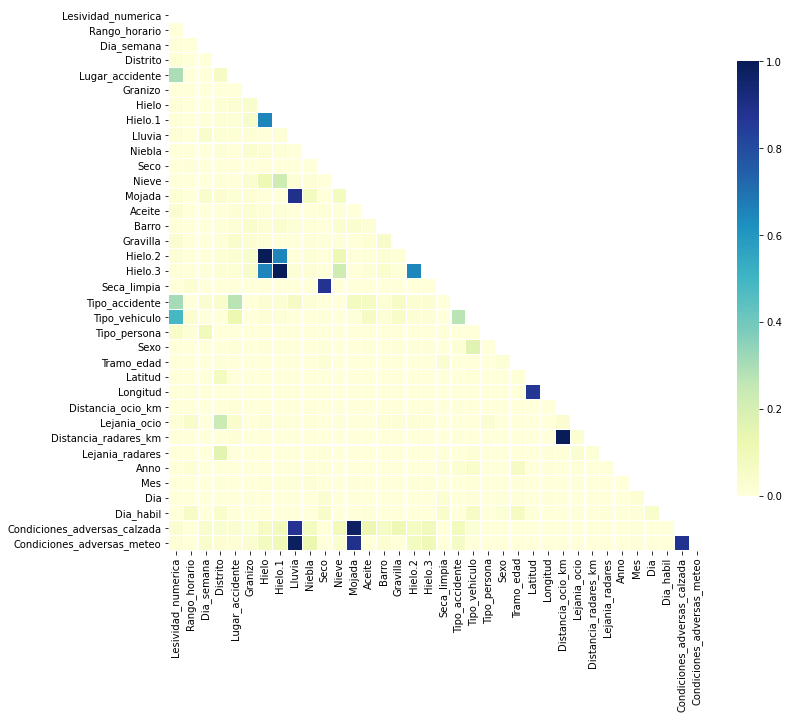

In [50]:
import seaborn as sns

corr=df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [51]:
corr = df.corr()
corr[['Lesividad_numerica']].sort_values(by = 'Lesividad_numerica',ascending = False)\
.style.background_gradient()

,Lesividad_numerica
Lesividad_numerica,1.000000
Tipo_vehiculo,0.489451
Tipo_accidente,0.311031
Lugar_accidente,0.299005
Tipo_persona,0.047252
Gravilla,0.029829
Condiciones_adversas_calzada,0.028591
Aceite,0.028063
Distrito,0.022363
Mojada,0.020138


Observamos como hay features entre si con una gran correlación ( relacionadas con las condiciones climáticas y/o de la calzada) por lo que decidimos dropear muchas de ellas. En cuanto a la correlación con nuestra target, vemos como en un primer estudio las features mas correladas con 'Lesividad_numerica' son 'Tipo_accidente','Tipo_vehiculo','Lugar_accidente'

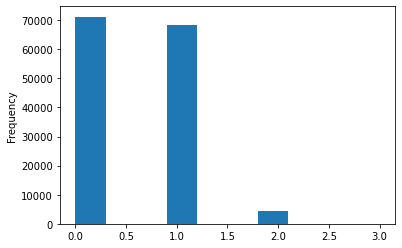

In [53]:
df['Lesividad_numerica'].plot.hist()

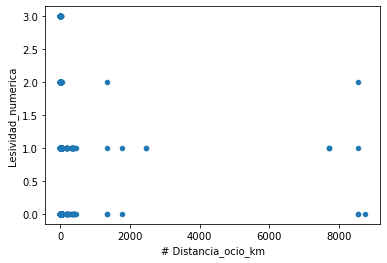

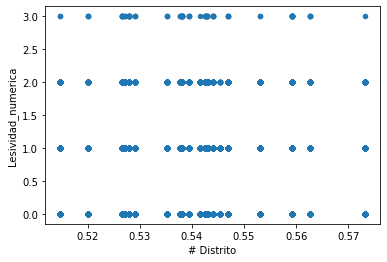

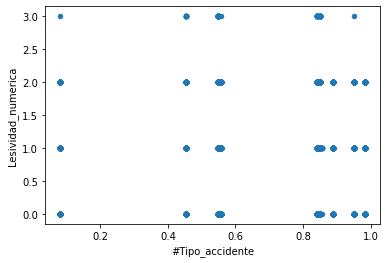

In [54]:
df.plot(kind = 'scatter',x='Distancia_ocio_km',y = 'Lesividad_numerica')
plt.xlabel('# Distancia_ocio_km')
plt.ylabel('Lesividad_numerica')
plt.show()

df.plot(kind = 'scatter',x='Distrito',y = 'Lesividad_numerica')
plt.xlabel('# Distrito')
plt.ylabel('Lesividad_numerica')
plt.show()
df.plot(kind = 'scatter',x='Tipo_accidente',y = 'Lesividad_numerica')
plt.xlabel('#Tipo_accidente')
plt.ylabel('Lesividad_numerica')
plt.show()

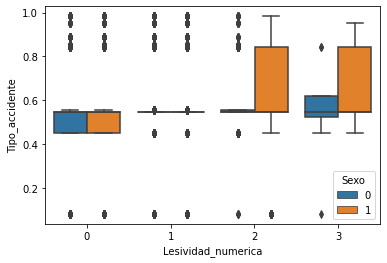

In [55]:
sns.boxplot(x ='Lesividad_numerica', y ='Tipo_accidente', data = df, hue ='Sexo')

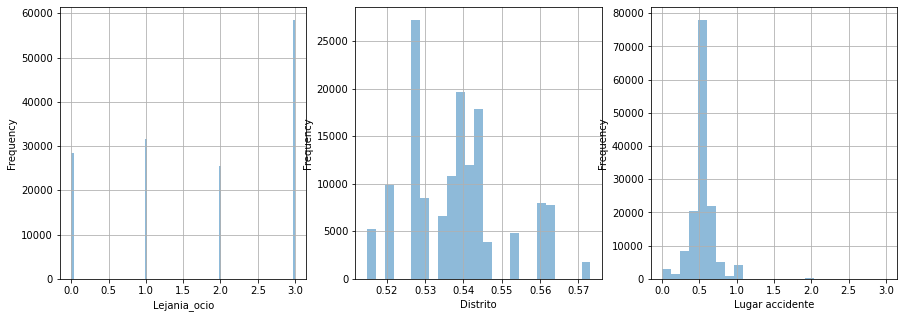

In [56]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Lejania_ocio'].plot.hist(alpha=0.5, bins=100, grid = True)
plt.xlabel('Lejania_ocio')

plt.subplot(1,3,2)
df['Distrito'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Distrito')

plt.subplot(1,3,3)
df['Lugar_accidente'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Lugar accidente')

plt.show()

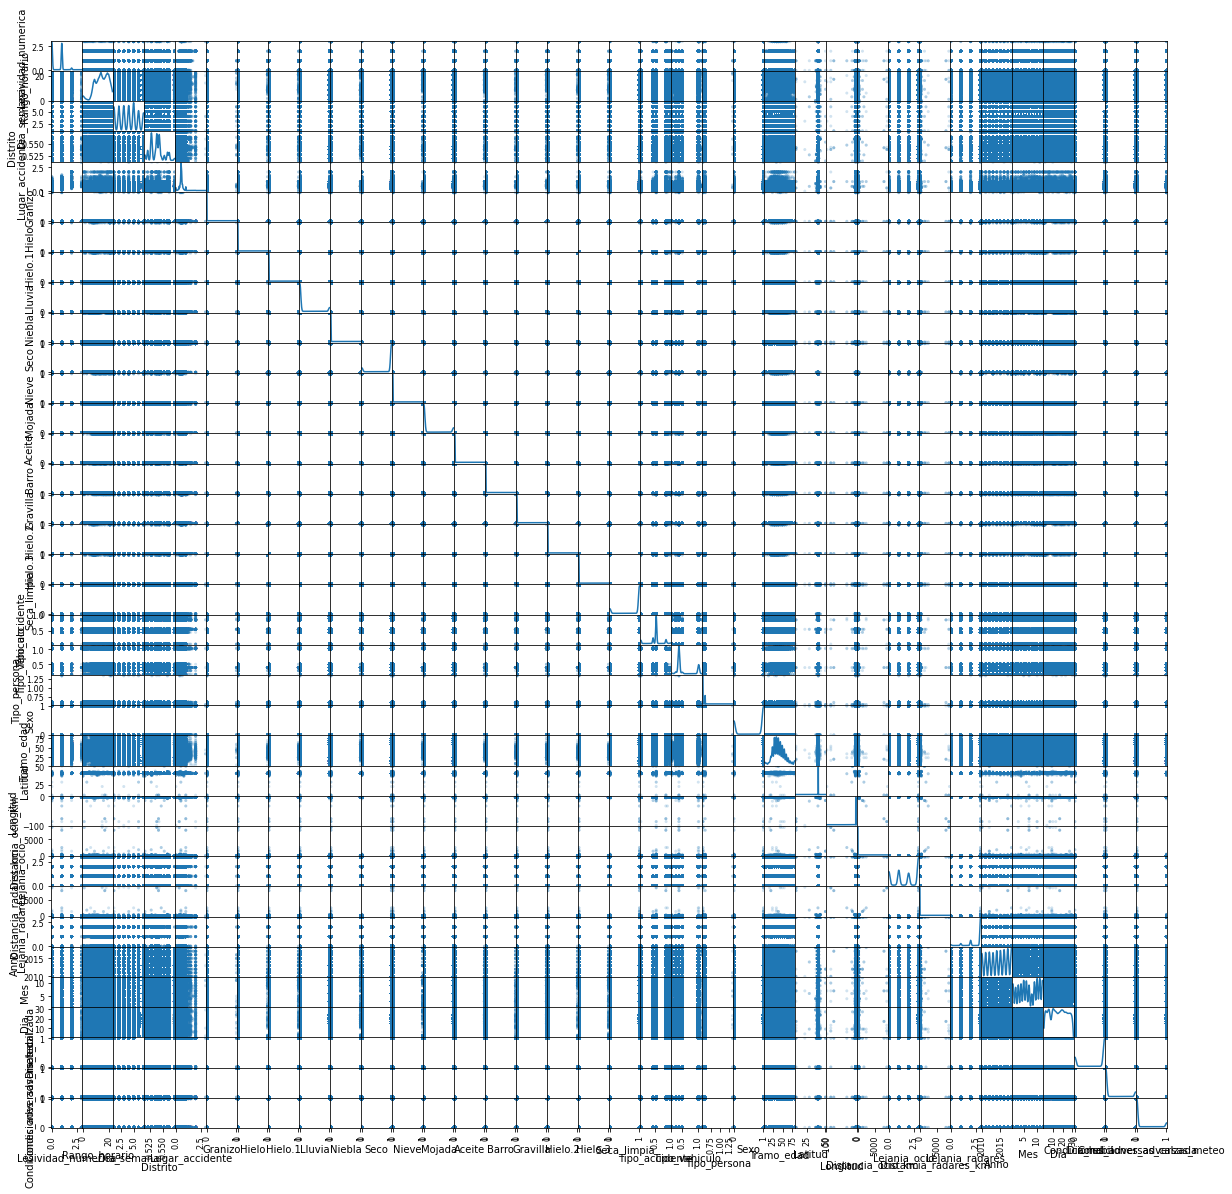

In [57]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [58]:
df=df.drop(['Granizo','Hielo.1','Hielo.2','Hielo.3','Lluvia','Niebla','Nieve','Mojada','Condiciones_adversas_meteo','Barro','Aceite','Gravilla',],axis=1)

In [59]:
df

,Lesividad_numerica,Rango_horario,Dia_semana,Distrito,Lugar_accidente,Hielo,Seco,Seca_limpia,Tipo_accidente,Tipo_vehiculo,...,Longitud,Distancia_ocio_km,Lejania_ocio,Distancia_radares_km,Lejania_radares,Anno,Mes,Dia,Dia_habil,Condiciones_adversas_calzada
0,1,16,7,0.573143,0.609467,0,1,1,0.547509,0.392960,...,-3.910258,5.966126,3,20.034451,3,2011,2,10,0,0
1,1,17,3,0.542599,0.545455,0,1,1,0.841638,0.392960,...,-3.652941,0.795508,2,1.342058,3,2015,6,24,1,0
2,1,4,5,0.542599,0.476190,0,1,1,0.547509,0.392960,...,-3.641188,1.809418,3,1.650425,3,2012,8,31,1,0
4,1,14,6,0.527174,1.000000,0,1,1,0.982747,1.017821,...,-3.694110,0.588265,2,0.080297,0,2014,5,31,0,0
5,0,13,6,0.552982,0.000000,0,1,1,0.547509,0.392960,...,-3.635118,4.895411,3,4.141752,3,2017,8,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159987,0,12,6,0.526661,0.581395,0,1,1,0.547509,0.392960,...,-3.674075,1.205056,3,0.170592,0,2017,5,8,0,0
159988,1,10,3,0.538136,0.521401,0,1,1,0.452055,0.291403,...,-3.683344,0.216405,1,2.342002,3,2017,11,1,1,0
159989,0,15,5,0.520044,0.500000,0,1,1,0.081226,0.392960,...,-3.695925,0.021567,0,2.707505,3,2015,8,28,1,0
159990,0,18,5,0.528020,0.528436,0,1,0,0.547509,0.392960,...,-3.645114,1.911166,3,2.276861,3,2018,11,16,1,0


In [60]:
df.columns

Index(['Lesividad_numerica', 'Rango_horario', 'Dia_semana', 'Distrito',
       'Lugar_accidente', 'Hielo', 'Seco', 'Seca_limpia', 'Tipo_accidente',
       'Tipo_vehiculo', 'Tipo_persona', 'Sexo', 'Tramo_edad', 'Latitud',
       'Longitud', 'Distancia_ocio_km', 'Lejania_ocio', 'Distancia_radares_km',
       'Lejania_radares', 'Anno', 'Mes', 'Dia', 'Dia_habil',
       'Condiciones_adversas_calzada'],
      dtype='object')

Buscamos outliers sobre todo para condiciones de distancias


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lesividad_numerica,144139.0,0.538036,0.559904,0.000000,0.000000,1.000000,1.000000,3.000000
Rango_horario,144139.0,14.126718,5.546447,0.000000,10.000000,14.000000,19.000000,23.000000
Dia_semana,144139.0,3.853440,1.911658,1.000000,2.000000,4.000000,5.000000,7.000000
Distrito,144139.0,0.538036,0.012521,0.514768,0.528020,0.538136,0.542946,0.573143
Lugar_accidente,144139.0,0.538036,0.167414,0.000000,0.489583,0.529601,0.583815,3.000000
Hielo,144139.0,0.000833,0.028842,0.000000,0.000000,0.000000,0.000000,1.000000
Seco,144139.0,0.880352,0.324551,0.000000,1.000000,1.000000,1.000000,1.000000
Seca_limpia,144139.0,0.859101,0.347918,0.000000,1.000000,1.000000,1.000000,1.000000
Tipo_accidente,144139.0,0.538036,0.174148,0.081226,0.547509,0.547509,0.547509,0.982747
Tipo_vehiculo,144139.0,0.538036,0.274046,0.166977,0.392960,0.392960,0.501497,1.121212


A primera vista podemos observar como existen outliers, por ejemplo, Distancia_ocio_km y Distancia_radares_km no pueden tenner un max cercano a 8750 km !!!!, así como en Latitud y Longitud donde, posiblemente, haya valores fuera de Madrid. Veámoslo gráficamente:

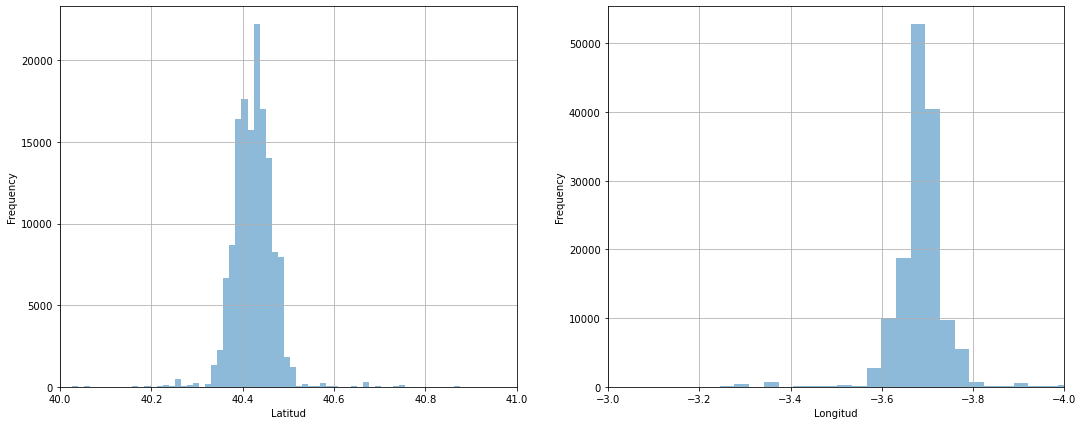

In [62]:
plt.figure(figsize=(18, 7))

plt.subplot(1,2,1)
df['Latitud'].plot.hist(alpha=0.5, bins=3000, grid = True, xlim=(40,41))
plt.xlabel('Latitud')

plt.subplot(1,2,2)
df['Longitud'].plot.hist(alpha=0.5, bins=3000, grid = True, xlim=(-3, -4))
plt.xlabel('Longitud')


plt.show()

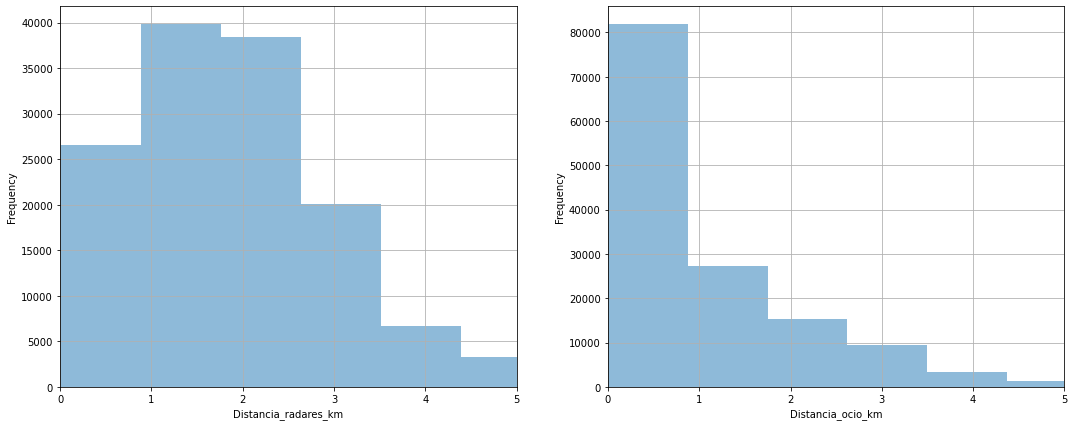

In [63]:
plt.figure(figsize=(18, 7))

plt.subplot(1,2,1)
df['Distancia_radares_km'].plot.hist(alpha=0.5, bins=10000, grid = True, xlim=(0,5))
plt.xlabel('Distancia_radares_km')

plt.subplot(1,2,2)
df['Distancia_ocio_km'].plot.hist(alpha=0.5, bins=10000, grid = True, xlim=(0,5))
plt.xlabel('Distancia_ocio_km')

plt.show()

In [64]:
df.sort_values(by=['Distancia_radares_km'],inplace=True,ascending=False)

In [65]:
df['Distancia_radares_km']

140463    8759.490110
99268     8555.893536
110716    8555.893536
72240     8555.893536
74281     8555.893536
             ...     
30684        0.009104
8588         0.009104
39928        0.009104
131929       0.009104
37267        0.008182
Name: Distancia_radares_km, Length: 144139, dtype: float64

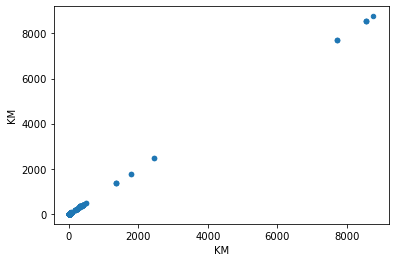

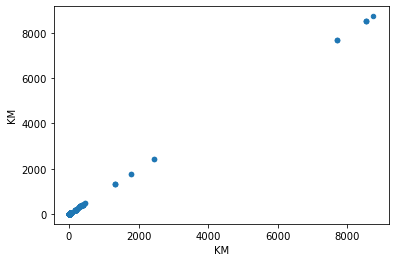

In [66]:
df.plot(kind = 'scatter',x='Distancia_radares_km',y = 'Distancia_radares_km')
plt.xlabel('KM')
plt.ylabel('KM')
plt.show() 

df.plot(kind = 'scatter',x='Distancia_ocio_km',y = 'Distancia_ocio_km')
plt.xlabel('KM')
plt.ylabel('KM')
plt.show() 

Voy a filtrar cuando las distancias sean menores que 100 km, así como Latitud y Longitud, ya que conocemos los valores para la ciudad de Madrid, lo cuál no es demasiado valiente :

In [67]:
my_filter = df['Latitud'] <= 43
my_filter2 = df['Latitud'] >= 38
my_filter3 = df['Longitud'] <= -3
my_filter4 = df['Longitud'] >= -5
my_filter5 = df['Distancia_ocio_km'] <= 100
my_filter6 = df['Distancia_radares_km'] <= 100

df_filtered = df[my_filter & my_filter2 & my_filter3 & my_filter4 & my_filter5 & my_filter6]

In [68]:
df_filtered

,Lesividad_numerica,Rango_horario,Dia_semana,Distrito,Lugar_accidente,Hielo,Seco,Seca_limpia,Tipo_accidente,Tipo_vehiculo,...,Longitud,Distancia_ocio_km,Lejania_ocio,Distancia_radares_km,Lejania_radares,Anno,Mes,Dia,Dia_habil,Condiciones_adversas_calzada
28917,0,15,3,0.514768,0.500000,0,1,1,0.547509,0.392960,...,-4.024193,41.841612,3,63.972385,3,2018,11,4,1,0
5164,1,15,3,0.514768,0.500000,0,1,1,0.547509,0.392960,...,-4.024193,41.841612,3,63.972385,3,2018,11,4,1,0
103787,0,14,3,0.526661,0.615385,0,1,1,0.547509,0.392960,...,-4.466106,53.101184,3,61.513251,3,2011,11,30,1,0
153214,1,15,5,0.526661,0.615385,0,0,0,0.889739,1.018205,...,-4.466106,53.101184,3,61.513251,3,2017,3,3,1,1
15106,0,22,6,0.526661,0.615385,0,1,1,0.547509,1.035363,...,-4.466106,53.101184,3,61.513251,3,2015,5,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30684,0,11,4,0.535205,0.500000,0,1,1,0.547509,0.392960,...,-3.731123,0.755110,2,0.009104,0,2013,3,14,1,0
8588,1,13,4,0.535205,0.500000,0,1,1,0.547509,1.035363,...,-3.731123,0.755110,2,0.009104,0,2012,7,6,1,0
39928,0,12,3,0.535205,0.500000,0,1,1,0.547509,0.392960,...,-3.731123,0.755110,2,0.009104,0,2013,11,13,1,0
131929,1,11,4,0.535205,0.500000,0,1,1,0.547509,1.035363,...,-3.731123,0.755110,2,0.009104,0,2013,3,14,1,0


In [69]:
df_filtered.shape

(144069, 24)

In [70]:
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Lesividad_numerica,144069.0,0.538006,0.559910,0.000000,0.000000,1.000000,1.000000,3.000000
Rango_horario,144069.0,14.128425,5.545722,0.000000,10.000000,14.000000,19.000000,23.000000
Dia_semana,144069.0,3.853459,1.911576,1.000000,2.000000,4.000000,5.000000,7.000000
Distrito,144069.0,0.538036,0.012519,0.514768,0.528020,0.538136,0.542946,0.573143
Lugar_accidente,144069.0,0.538006,0.167284,0.000000,0.489583,0.529601,0.583815,3.000000
Hielo,144069.0,0.000833,0.028849,0.000000,0.000000,0.000000,0.000000,1.000000
Seco,144069.0,0.880405,0.324489,0.000000,1.000000,1.000000,1.000000,1.000000
Seca_limpia,144069.0,0.859158,0.347860,0.000000,1.000000,1.000000,1.000000,1.000000
Tipo_accidente,144069.0,0.538017,0.174161,0.081226,0.547509,0.547509,0.547509,0.982747
Tipo_vehiculo,144069.0,0.538064,0.274057,0.166977,0.392960,0.392960,0.501497,1.121212


In [71]:
df=df_filtered

Guardamos el dataset de train listo para implementar:

In [72]:
df.to_csv('./trainREADY.csv', sep=';', decimal='.', index=False)

Ahora hacemos lo mismo para test

In [73]:
df_test= pd.read_csv('./testOK.csv', sep=';', decimal='.')

In [74]:
df_test

,Unnamed: 0,Lesividad,Rango_horario,Dia_semana,Distrito,Lugar_accidente,Parte,Granizo,Hielo,Hielo.1,...,Longitud,Distancia_ocio_km,Lejania_ocio,Distancia_radares_km,Lejania_radares,Fecha_formato,Year,Mes,Dia,Dia_habil
0,78885,HL,DE 9:00 A 9:59,SABADO,CARABANCHEL,CALLE DEL GENERAL RICARDOS,2010/8732,NO,NO,NO,...,-3.721422,0.837619,lejos,0.946964,lejos,2010-02-10,2010,2,10,0
1,49057,IL,DE 18:00 A 18:59,VIERNES,SALAMANCA,CALLE DE VILLALAR - CALLE DE RECOLETOS,2012/3265,NO,NO,NO,...,-3.689563,0.051679,Muy cerca,2.541680,muy lejos,2012-06-04,2012,6,4,1
2,101707,HL,DE 19:00 A 19:59,JUEVES,HORTALEZA,AVENIDA DEL ARROYO DEL SANTO - CALLE DE LAS PE...,2010/8341,NO,NO,NO,...,-3.620312,0.650374,lejos,4.205781,muy lejos,2010-09-23,2010,9,23,1
3,97256,IL,DE 20:00 A 20:59,SABADO,FUENCARRAL-EL PARDO,CALLE DE LOS MONASTERIOS DE SUSO Y YUSO - CALL...,2012/1841,NO,NO,NO,...,-3.704810,1.709451,muy lejos,2.933448,muy lejos,2012-02-25,2012,2,25,0
4,53589,IL,DE 9:00 A 9:59,MIERCOLES,FUENCARRAL-EL PARDO,CARRETERA DE FUENCARRAL A ALCOBENDAS,2010/5722,NO,NO,NO,...,-3.669314,4.149600,muy lejos,4.180054,muy lejos,2010-06-23,2010,6,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,15138,HL,DE 20:00 A 20:59,VIERNES,TETUAN,CALLE DE BRAVO MURILLO - CALLE DEL DOCTOR SANTERO,2011/2205,NO,NO,NO,...,-3.703853,0.541227,lejos,3.218984,muy lejos,2011-04-03,2011,4,3,1
39995,154743,HL,DE 7:00 A 7:59,DOMINGO,MONCLOA-ARAVACA,AUTOVIA M-30 CALZADA 1 KM.,2018/2735,NO,NO,NO,...,-3.759636,0.568860,lejos,1.925402,muy lejos,2018-11-03,2018,11,3,0
39996,155545,HL,DE 15:00 A 15:59,JUEVES,SAN BLAS,CALLE DE AJOFRIN - AVENIDA DE ARCENTALES,2011/7401,NO,NO,NO,...,-3.625819,3.046228,muy lejos,2.899534,muy lejos,2011-11-08,2011,11,8,1
39997,69479,IL,DE 13:00 A 13:59,MARTES,SALAMANCA,CALLE DE SERRANO,2017/142,NO,NO,NO,...,-3.687038,0.199883,Muy cerca,2.338334,muy lejos,2016-12-27,2016,12,27,1


In [75]:
df_test.shape

(39999, 37)

In [76]:

missing_values_table(df_test)

Your selected dataframe has 37 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [77]:
df_test.isna().sum()

Unnamed: 0              0
Lesividad               0
Rango_horario           0
Dia_semana              0
Distrito                0
Lugar_accidente         0
Parte                   0
Granizo                 0
Hielo                   0
Hielo.1                 0
Lluvia                  0
Niebla                  0
Seco                    0
Nieve                   0
Mojada                  0
Aceite                  0
Barro                   0
Gravilla                0
Hielo.2                 0
Hielo.3                 0
Seca_limpia             0
Tipo_accidente          0
Tipo_vehiculo           0
Tipo_persona            0
Sexo                    0
Tramo_edad              0
Latitud                 0
Longitud                0
Distancia_ocio_km       0
Lejania_ocio            0
Distancia_radares_km    0
Lejania_radares         0
Fecha_formato           0
Year                    0
Mes                     0
Dia                     0
Dia_habil               0
dtype: int64

In [78]:
df_test=df_test.drop(['Unnamed: 0'], axis=1)

In [79]:
lesividad_test_mapping = {'IL':0,
                     'HL':1,
                     'HG':2,
                     'MT':3}
df_test['Lesividad_numerica']=df_test['Lesividad'].map(lesividad_test_mapping)

In [80]:
df_test['Lesividad_numerica'].value_counts()

1    19389
0    18882
2     1676
3       52
Name: Lesividad_numerica, dtype: int64

In [81]:

df_test.head().T

,0,1,2,3,4
Lesividad,HL,IL,HL,IL,IL
Rango_horario,DE 9:00 A 9:59,DE 18:00 A 18:59,DE 19:00 A 19:59,DE 20:00 A 20:59,DE 9:00 A 9:59
Dia_semana,SABADO,VIERNES,JUEVES,SABADO,MIERCOLES
Distrito,CARABANCHEL,SALAMANCA,HORTALEZA,FUENCARRAL-EL PARDO,FUENCARRAL-EL PARDO
Lugar_accidente,CALLE DEL GENERAL RICARDOS,CALLE DE VILLALAR - CALLE DE RECOLETOS,AVENIDA DEL ARROYO DEL SANTO - CALLE DE LAS PE...,CALLE DE LOS MONASTERIOS DE SUSO Y YUSO - CALL...,CARRETERA DE FUENCARRAL A ALCOBENDAS
Parte,2010/8732,2012/3265,2010/8341,2012/1841,2010/5722
Granizo,NO,NO,NO,NO,NO
Hielo,NO,NO,NO,NO,NO
Hielo.1,NO,NO,NO,NO,NO
Lluvia,NO,NO,NO,NO,NO


In [82]:
colnames = df_test.columns.tolist()
colnames = colnames[-1:] + colnames[:-1]
df_test=df_test[colnames]

In [83]:
df_test.head()

,Lesividad_numerica,Lesividad,Rango_horario,Dia_semana,Distrito,Lugar_accidente,Parte,Granizo,Hielo,Hielo.1,...,Longitud,Distancia_ocio_km,Lejania_ocio,Distancia_radares_km,Lejania_radares,Fecha_formato,Year,Mes,Dia,Dia_habil
0,1,HL,DE 9:00 A 9:59,SABADO,CARABANCHEL,CALLE DEL GENERAL RICARDOS,2010/8732,NO,NO,NO,...,-3.721422,0.837619,lejos,0.946964,lejos,2010-02-10,2010,2,10,0
1,0,IL,DE 18:00 A 18:59,VIERNES,SALAMANCA,CALLE DE VILLALAR - CALLE DE RECOLETOS,2012/3265,NO,NO,NO,...,-3.689563,0.051679,Muy cerca,2.541680,muy lejos,2012-06-04,2012,6,4,1
2,1,HL,DE 19:00 A 19:59,JUEVES,HORTALEZA,AVENIDA DEL ARROYO DEL SANTO - CALLE DE LAS PE...,2010/8341,NO,NO,NO,...,-3.620312,0.650374,lejos,4.205781,muy lejos,2010-09-23,2010,9,23,1
3,0,IL,DE 20:00 A 20:59,SABADO,FUENCARRAL-EL PARDO,CALLE DE LOS MONASTERIOS DE SUSO Y YUSO - CALL...,2012/1841,NO,NO,NO,...,-3.704810,1.709451,muy lejos,2.933448,muy lejos,2012-02-25,2012,2,25,0
4,0,IL,DE 9:00 A 9:59,MIERCOLES,FUENCARRAL-EL PARDO,CARRETERA DE FUENCARRAL A ALCOBENDAS,2010/5722,NO,NO,NO,...,-3.669314,4.149600,muy lejos,4.180054,muy lejos,2010-06-23,2010,6,23,1


In [84]:
lejania_test_mapping = {'Muy cerca':0,
                     'Cerca':1,
                     'lejos':2,
                     'muy lejos':3}
df_test['Lejania_ocio']=df_test['Lejania_ocio'].map(lejania_test_mapping)

In [85]:
lejania_test_mapping2 = {'Muy cerca':0,
                     'Cerca':1,
                     'lejos':2,
                     'muy lejos':3}
df_test['Lejania_radares']=df_test['Lejania_radares'].map(lejania_test_mapping2)

In [86]:
df_test=df_test.replace({"DE 00:00 A 00:59": 0, 
            "DE 1:00 A 1:59": 1,
            "DE 2:00 A 2:59": 2,
            "DE 3:00 A 3:59": 3,
            "DE 4:00 A 4:59": 4,
            "DE 5:00 A 5:59": 5,
            "DE 6:00 A 6:59": 6,
            "DE 7:00 A 7:59": 7,
            "DE 8:00 A 8:59": 8,
            "DE 9:00 A 9:59": 9,
            "DE 10:00 A 10:59": 10,
            "DE 11:00 A 11:59": 11,
            "DE 12:00 A 12:59": 12,
            "DE 13:00 A 13:59": 13,
            "DE 14:00 A 14:59": 14,
            "DE 15:00 A 15:59": 15,
            "DE 16:00 A 16:59": 16,
            "DE 17:00 A 17:59": 17,
            "DE 18:00 A 18:59": 18,
            "DE 19:00 A 19:59": 19,
            "DE 20:00 A 20:59": 20,
            "DE 21:00 A 21:59": 21,
            "DE 22:00 A 22:59": 22,
            "DE 23:00 A 23:59": 23})


In [87]:
df_test=df_test.replace({"LUNES": 1, 
            "MARTES": 2,
            "MIERCOLES": 3,
            "JUEVES": 4,
            "VIERNES": 5,
            "SABADO": 6,
            "DOMINGO": 7,
         })

In [88]:
df_test.head()

,Lesividad_numerica,Lesividad,Rango_horario,Dia_semana,Distrito,Lugar_accidente,Parte,Granizo,Hielo,Hielo.1,...,Longitud,Distancia_ocio_km,Lejania_ocio,Distancia_radares_km,Lejania_radares,Fecha_formato,Year,Mes,Dia,Dia_habil
0,1,HL,9,6,CARABANCHEL,CALLE DEL GENERAL RICARDOS,2010/8732,NO,NO,NO,...,-3.721422,0.837619,2,0.946964,2,2010-02-10,2010,2,10,0
1,0,IL,18,5,SALAMANCA,CALLE DE VILLALAR - CALLE DE RECOLETOS,2012/3265,NO,NO,NO,...,-3.689563,0.051679,0,2.541680,3,2012-06-04,2012,6,4,1
2,1,HL,19,4,HORTALEZA,AVENIDA DEL ARROYO DEL SANTO - CALLE DE LAS PE...,2010/8341,NO,NO,NO,...,-3.620312,0.650374,2,4.205781,3,2010-09-23,2010,9,23,1
3,0,IL,20,6,FUENCARRAL-EL PARDO,CALLE DE LOS MONASTERIOS DE SUSO Y YUSO - CALL...,2012/1841,NO,NO,NO,...,-3.704810,1.709451,3,2.933448,3,2012-02-25,2012,2,25,0
4,0,IL,9,3,FUENCARRAL-EL PARDO,CARRETERA DE FUENCARRAL A ALCOBENDAS,2010/5722,NO,NO,NO,...,-3.669314,4.149600,3,4.180054,3,2010-06-23,2010,6,23,1


In [89]:
df_test.rename(columns={'Year':'Anno'},inplace=True)

In [90]:
df_test['Granizo'] = df_test['Granizo'].replace({'SI':1, 'NO':0})
df_test['Hielo'] = df_test['Hielo'].replace({'SI':1, 'NO':0})
df_test['Hielo.1'] = df_test['Hielo.1'].replace({'SI':1, 'NO':0})
df_test['Lluvia'] = df_test['Lluvia'].replace({'SI':1, 'NO':0})
df_test['Niebla'] = df_test['Niebla'].replace({'SI':1, 'NO':0})
df_test['Seco'] = df_test['Seco'].replace({'SI':1, 'NO':0})
df_test['Nieve'] = df_test['Nieve'].replace({'SI':1, 'NO':0})
df_test['Mojada'] = df_test['Mojada'].replace({'SI':1, 'NO':0})
df_test['Aceite'] = df_test['Aceite'].replace({'SI':1, 'NO':0})
df_test['Barro'] = df_test['Barro'].replace({'SI':1, 'NO':0})
df_test['Gravilla'] = df_test['Gravilla'].replace({'SI':1, 'NO':0})
df_test['Hielo.2'] = df_test['Hielo.2'].replace({'SI':1, 'NO':0})
df_test['Hielo.3'] = df_test['Hielo.3'].replace({'SI':1, 'NO':0})
df_test['Seca_limpia'] = df_test['Seca_limpia'].replace({'SI':1, 'NO':0})

In [91]:
df_test['Condiciones_adversas_calzada']=df_test['Hielo.2']+df_test['Hielo.3']+df_test['Nieve']+df_test['Mojada']+df_test['Aceite']+df_test['Barro']+df_test['Gravilla']
df_test['Condiciones_adversas_meteo']=df_test['Hielo.1']+df_test['Granizo']+df_test['Hielo']+df_test['Hielo.1']+df_test['Niebla']+df_test['Lluvia']
df_test['Condiciones_adversas_calzada']=(df_test['Condiciones_adversas_calzada'] > 0)*1
df_test['Condiciones_adversas_meteo']=(df_test['Condiciones_adversas_meteo'] > 0)*1

In [92]:
df_test.dtypes

Lesividad_numerica                int64
Lesividad                        object
Rango_horario                     int64
Dia_semana                        int64
Distrito                         object
Lugar_accidente                  object
Parte                            object
Granizo                           int64
Hielo                             int64
Hielo.1                           int64
Lluvia                            int64
Niebla                            int64
Seco                              int64
Nieve                             int64
Mojada                            int64
Aceite                            int64
Barro                             int64
Gravilla                          int64
Hielo.2                           int64
Hielo.3                           int64
Seca_limpia                       int64
Tipo_accidente                   object
Tipo_vehiculo                    object
Tipo_persona                     object
Sexo                             object


In [93]:
df_test = df_test.drop(df_test[df_test['Sexo']=='NO ASIGNADO'].index)

In [94]:
df_test = df_test.drop(df_test[df_test['Tipo_accidente']=='OTRAS CAUSAS'].index)

In [95]:
df_test = df_test.drop(df_test[df_test['Tramo_edad']=='DESCONOCIDA'].index)

In [96]:
df_test['Sexo'] = df_test['Sexo'].replace({'HOMBRE':1, 'MUJER':0})

In [97]:
df_test= df_test.drop(df_test[df_test['Tipo_vehiculo']=='NO ASIGNADO'].index)
df_test = df_test.drop(df_test[df_test['Tipo_vehiculo']=='VARIOS'].index)

In [98]:
for c in categorical:
    df_test[c] = df_test[c].map(mean_map[c])

In [99]:
df_test

,Lesividad_numerica,Lesividad,Rango_horario,Dia_semana,Distrito,Lugar_accidente,Parte,Granizo,Hielo,Hielo.1,...,Lejania_ocio,Distancia_radares_km,Lejania_radares,Fecha_formato,Anno,Mes,Dia,Dia_habil,Condiciones_adversas_calzada,Condiciones_adversas_meteo
0,1,HL,9,6,0.529012,0.521802,2010/8732,0,0,0,...,2,0.946964,2,2010-02-10,2010,2,10,0,0,0
1,0,IL,18,5,0.526661,0.333333,2012/3265,0,0,0,...,0,2.541680,3,2012-06-04,2012,6,4,1,0,0
2,1,HL,19,4,0.552982,0.333333,2010/8341,0,0,0,...,2,4.205781,3,2010-09-23,2010,9,23,1,0,0
3,0,IL,20,6,0.559222,0.600000,2012/1841,0,0,0,...,3,2.933448,3,2012-02-25,2012,2,25,0,0,0
4,0,IL,9,3,0.559222,0.833333,2010/5722,0,0,0,...,3,4.180054,3,2010-06-23,2010,6,23,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39993,0,IL,1,6,0.542946,0.500000,2010/5307,0,0,0,...,0,2.741699,3,2010-12-06,2010,12,6,0,1,1
39994,1,HL,20,5,0.544002,0.625000,2011/2205,0,0,0,...,2,3.218984,3,2011-04-03,2011,4,3,1,1,1
39995,1,HL,7,7,0.562741,0.529601,2018/2735,0,0,0,...,2,1.925402,3,2018-11-03,2018,11,3,0,1,1
39996,1,HL,15,4,0.537926,0.750000,2011/7401,0,0,0,...,3,2.899534,3,2011-11-08,2011,11,8,1,0,0


In [100]:
df_test.isnull().sum()

Lesividad_numerica                0
Lesividad                         0
Rango_horario                     0
Dia_semana                        0
Distrito                          0
Lugar_accidente                 854
Parte                             0
Granizo                           0
Hielo                             0
Hielo.1                           0
Lluvia                            0
Niebla                            0
Seco                              0
Nieve                             0
Mojada                            0
Aceite                            0
Barro                             0
Gravilla                          0
Hielo.2                           0
Hielo.3                           0
Seca_limpia                       0
Tipo_accidente                    0
Tipo_vehiculo                     0
Tipo_persona                      0
Sexo                              0
Tramo_edad                        0
Latitud                           0
Longitud                    

In [101]:
df_test['Lugar_accidente'].value_counts()

0.500000    2422
1.000000    1363
0.529601    1225
0.000000    1196
0.573382    1065
            ... 
1.400000       1
0.090909       1
3.000000       1
0.405405       1
0.238095       1
Name: Lugar_accidente, Length: 538, dtype: int64

Vemos que tenemos valores Nan, por lo que tenemos que solventarlo

In [102]:
df_test['Lugar_accidente'].fillna(df_test['Lugar_accidente'].mean(), inplace=True)

In [103]:
df_test['Lugar_accidente'].isna().sum()

0

In [104]:
df_test=df_test.drop(['Lesividad'], axis=1)

In [105]:
df_test=df_test.drop(['Fecha_formato'], axis=1)

In [106]:
df_test=df_test.replace({"DE 0 A 5 AÑOS": 5,
            "DE 6 A 9 AÑOS": 9,
            "DE 10 A 14 AÑOS": 14,
            "DE 15 A 17 AÑOS": 17,
            "DE 18 A 20 AÑOS": 20,
            "DE 21 A 24 AÑOS": 24,
            "DE 25 A 29 AÑOS": 29,
            "DE 30 A 34 ANOS": 34,
            "DE 35 A 39 AÑOS": 39,
            "DE 40 A 44 AÑOS": 44,
            "DE 45 A 49 AÑOS": 49,
            "DE 50 A 54 AÑOS": 54,
            "DE 55 A 59 AÑOS": 59,
            "DE 60 A 64 AÑOS": 64,
            "DE 65 A 69 AÑOS": 69,
            "DE 70 A 74 AÑOS": 74,
            "DE MAS DE 74 AÑOS": 80})


In [103]:
df_test.T

,0,1,2,3,4,5,6,7,8,9,...,39985,39986,39987,39988,39989,39993,39994,39995,39996,39997
Lesividad_numerica,1,0,1,0,0,0,1,0,1,1,...,0,1,1,0,0,0,1,1,1,0
Rango_horario,9,18,19,20,9,20,20,21,13,8,...,10,0,7,20,23,1,20,7,15,13
Dia_semana,6,5,4,6,3,1,5,5,7,2,...,7,3,3,2,7,6,5,7,4,2
Distrito,0.529012,0.526661,0.552982,0.559222,0.559222,0.537926,0.535205,0.542599,0.552982,0.535205,...,0.559222,0.529012,0.526661,0.526661,0.535205,0.542946,0.544002,0.562741,0.537926,0.526661
Lugar_accidente,0.521802,0.333333,0.333333,0.6,0.833333,0.75,0.6,0.727273,0.5,0.583016,...,0.447368,1,0.444444,0.5,0.428571,0.5,0.625,0.529601,0.75,0.563147
Parte,2010/8732,2012/3265,2010/8341,2012/1841,2010/5722,2013/5958,2011/1371,2013/10493,2018/4500,2015/6983,...,2012/1385,2015/7439,2015/1522,2013/5036,2016/1184,2010/5307,2011/2205,2018/2735,2011/7401,2017/142
Granizo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hielo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hielo.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lluvia,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,0,0


In [107]:
df_test=df_test.drop(['Parte'], axis=1)

In [108]:
df_test.corr()

,Lesividad_numerica,Rango_horario,Dia_semana,Distrito,Lugar_accidente,Granizo,Hielo,Hielo.1,Lluvia,Niebla,...,Distancia_ocio_km,Lejania_ocio,Distancia_radares_km,Lejania_radares,Anno,Mes,Dia,Dia_habil,Condiciones_adversas_calzada,Condiciones_adversas_meteo
Lesividad_numerica,1.000000,-0.028599,-0.000189,0.028403,-0.063014,0.005621,0.018447,0.015991,0.021555,0.009904,...,0.007185,0.005918,0.007210,-0.000679,-0.011376,0.005028,-0.007276,-0.005291,0.037009,0.024760
Rango_horario,-0.028599,1.000000,-0.038068,-0.004850,-0.019387,0.009532,-0.017682,-0.013963,-0.008228,-0.038713,...,-0.003420,0.045294,-0.004079,-0.005047,0.016134,0.005517,-0.001414,0.053202,-0.033678,-0.014748
Dia_semana,-0.000189,-0.038068,1.000000,-0.030489,-0.009943,0.003242,0.001860,-0.006660,0.038857,-0.001710,...,0.002186,-0.010072,0.002387,0.000694,-0.008243,-0.005915,-0.022697,-0.711952,0.036049,0.038733
Distrito,0.028403,-0.004850,-0.030489,1.000000,0.060646,0.003275,0.011757,0.011887,0.021548,0.012628,...,0.002446,0.227623,0.002271,0.154459,0.002434,0.011474,0.003786,0.030600,0.027112,0.024477
Lugar_accidente,-0.063014,-0.019387,-0.009943,0.060646,1.000000,0.000112,0.017253,0.004630,0.001183,-0.001801,...,-0.007569,0.037340,-0.007559,0.001131,-0.019038,-0.003282,0.006576,-0.001047,0.011707,0.002690
Granizo,0.005621,0.009532,0.003242,0.003275,0.000112,1.000000,-0.000335,-0.000435,0.002919,0.043718,...,-0.000247,0.002077,-0.000341,-0.004974,0.000236,-0.015659,0.018418,-0.009639,0.008729,0.031429
Hielo,0.018447,-0.017682,0.001860,0.011757,0.017253,-0.000335,1.000000,0.609755,-0.010471,-0.001514,...,0.000042,0.012529,0.000131,0.006119,-0.019571,0.007672,-0.013358,0.000387,0.069887,0.075717
Hielo.1,0.015991,-0.013963,-0.006660,0.011887,0.004630,-0.000435,0.609755,1.000000,0.018895,-0.001969,...,-0.000420,0.006506,-0.000298,0.007337,-0.015053,0.008742,-0.024642,0.005443,0.090869,0.098449
Lluvia,0.021555,-0.008228,0.038857,0.021548,0.001183,0.002919,-0.010471,0.018895,1.000000,0.001281,...,-0.001749,-0.006695,-0.001472,-0.004528,-0.000605,0.004944,-0.035013,-0.048944,0.878675,0.982832
Niebla,0.009904,-0.038713,-0.001710,0.012628,-0.001801,0.043718,-0.001514,-0.001969,0.001281,1.000000,...,-0.000527,0.014749,-0.000782,-0.004418,-0.005327,0.007405,-0.009140,-0.004580,0.084741,0.142146


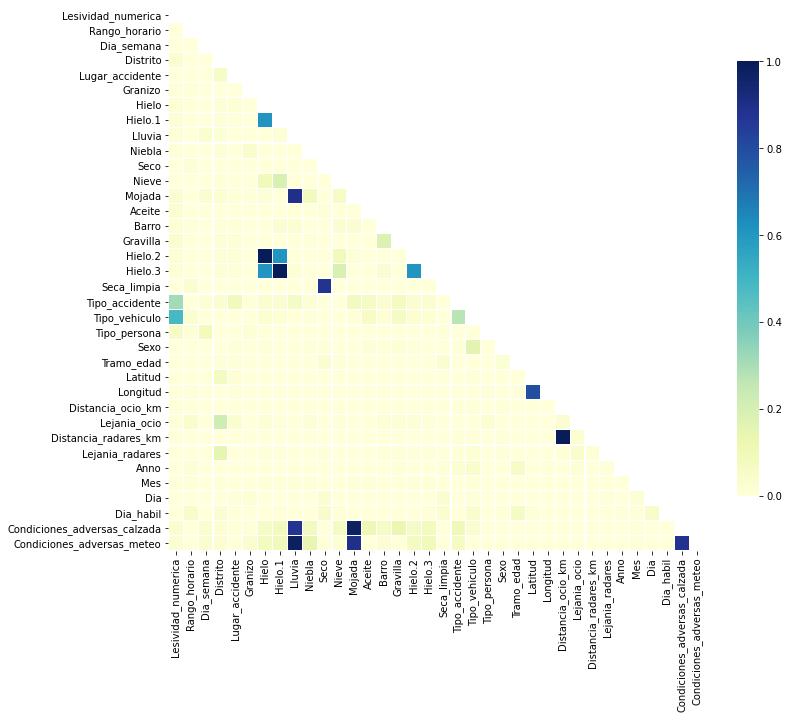

In [109]:
import seaborn as sns

corr=df_test.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [110]:
corr = df_test.corr()
corr[['Lesividad_numerica']].sort_values(by = 'Lesividad_numerica',ascending = False)\
.style.background_gradient()

,Lesividad_numerica
Lesividad_numerica,1.000000
Tipo_vehiculo,0.485940
Tipo_accidente,0.314678
Tipo_persona,0.058085
Condiciones_adversas_calzada,0.037009
Gravilla,0.036598
Distrito,0.028403
Mojada,0.027741
Condiciones_adversas_meteo,0.024760
Aceite,0.024319


In [111]:
df_test=df_test.drop(['Granizo','Hielo.1','Hielo.2','Hielo.3','Lluvia','Niebla','Nieve','Mojada','Condiciones_adversas_meteo','Barro','Aceite','Gravilla',],axis=1)

In [112]:
my_filter = df_test['Latitud'] <= 43
my_filter2 = df_test['Latitud'] >= 38
my_filter3 = df_test['Longitud'] <= -3
my_filter4 = df_test['Longitud'] >= -5
my_filter5 = df_test['Distancia_ocio_km'] <= 100
my_filter6 = df_test['Distancia_radares_km'] <= 100

df_test_filtered = df_test[my_filter & my_filter2 & my_filter3 & my_filter4 & my_filter5 & my_filter6]

In [113]:
df_test=df_test_filtered

In [114]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Lesividad_numerica,35959.0,0.533274,0.559143,0.000000,0.000000,1.000000,1.000000,3.000000
Rango_horario,35959.0,14.132595,5.528003,0.000000,10.000000,14.000000,19.000000,23.000000
Dia_semana,35959.0,3.875191,1.909312,1.000000,2.000000,4.000000,5.000000,7.000000
Distrito,35959.0,0.537936,0.012512,0.514768,0.528020,0.538136,0.542946,0.573143
Lugar_accidente,35959.0,0.538656,0.184014,0.000000,0.491525,0.532609,0.583815,3.000000
Hielo,35959.0,0.000806,0.028387,0.000000,0.000000,0.000000,0.000000,1.000000
Seco,35959.0,0.877054,0.328379,0.000000,1.000000,1.000000,1.000000,1.000000
Seca_limpia,35959.0,0.856030,0.351064,0.000000,1.000000,1.000000,1.000000,1.000000
Tipo_accidente,35959.0,0.538379,0.173465,0.081226,0.547509,0.547509,0.547509,0.982747
Tipo_vehiculo,35959.0,0.535698,0.272531,0.166977,0.392960,0.392960,0.501497,1.121212


Guardamos test para luego implementar:

In [115]:
df_test.to_csv('./testREADY.csv', sep=';', decimal='.', index=False)

Con ello, dejamos todo listo para los modelos de ML, DL que podamos analizar